In [35]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns


In [5]:
# periodic
#  Pearson correlation
peri_pc = pd.read_csv('./Periodic/read_p_c.csv')
peri_pc_f= peri_pc.iloc[2:,0].tolist()

# tree based
peri_tb = pd.read_csv('./Periodic/read_t_b.csv')
peri_tb_f=peri_tb.iloc[0:,0].tolist()

# ARR
peri_arr = pd.read_csv('./Periodic/read_arr.csv')
peri_arr_f=peri_arr.iloc[0:,0].tolist()

# flash
#  Pearson correlation
flash_pc = pd.read_csv('./Flash/read_p_c.csv')
flash_pc_f= flash_pc.iloc[2:,0].tolist()

# tree based
flash_tb = pd.read_csv('./Flash/read_t_b.csv')
flash_tb_f=flash_tb.iloc[0:,0].tolist()

# ARR
flash_arr = pd.read_csv('./Flash/read_arr.csv')
flash_arr_f=flash_arr.iloc[0:,0].tolist()

In [32]:
def findMutual(list1,list2,k_):
    f = set(list1[:k_]).intersection(set(list2[:k_]))
    return len(f)

In [128]:
k =64
fset = [peri_pc_f,peri_tb_f,peri_arr_f,flash_pc_f,flash_tb_f,flash_arr_f]

mat = [[ 0 for _ in range(6)] for _ in range(6)]
for i in range(6):
    for j in range(6):
        mat[i][j] = findMutual(fset[i],fset[j],k)

matdf = DataFrame(mat)
matdf.columns = ["P-Pearson correlation","P-Tree-based","P-ARR","F-Pearson correlation","F-Tree-based","F-ARR"]
matdf.index = ["P-Pearson correlation","P-Tree-based","P-ARR","F-Pearson correlation","F-Tree-based","F-ARR"]

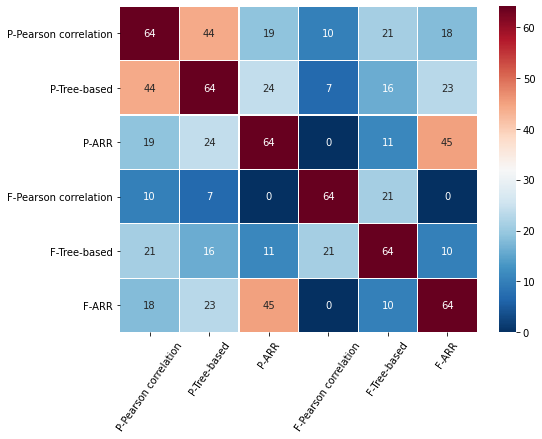

In [129]:
f,ax= plt.subplots(figsize = (8,6))

cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

plt.xticks(rotation=55)
sns.heatmap(matdf, linewidths = 0.05,  cmap="RdBu_r" , annot=True) 

# ax.set_title('matplotlib colormap')
# ax.set_xlabel('region')
# ax.set_ylabel('kind')


plt.savefig("./Fig/heatmap64.png",dpi=300,bbox_inches='tight')

In [99]:
print(len(flash_pc_f))
print(len(flash_tb_f))
print(len(flash_arr_f))

print(len(peri_pc_f))
print(len(peri_tb_f))
print(len(peri_arr_f))

1709
200
1709
1746
200
1746


<AxesSubplot:>

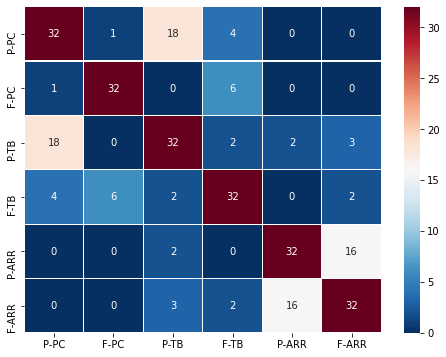

In [121]:
k = 32
fset = [peri_pc_f,flash_pc_f,peri_tb_f,flash_tb_f,peri_arr_f,flash_arr_f]

mat2 = [[ 0 for _ in range(6)] for _ in range(6)]
for i in range(6):
    for j in range(6):
        mat2[i][j] = findMutual(fset[i],fset[j],k)

matdf2 = DataFrame(mat2)
matdf2.columns = ["P-PC","F-PC","P-TB","F-TB","P-ARR","F-ARR"]
matdf2.index = ["P-PC","F-PC","P-TB","F-TB","P-ARR","F-ARR"]


f,ax= plt.subplots(figsize = (8,6))

cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

#plt.xticks(rotation=55)
plt.yticks(rotation=90)
sns.heatmap(matdf2, linewidths = 0.05,  cmap="RdBu_r" , annot=True) 

# ax.set_title('matplotlib colormap')
# ax.set_xlabel('region')
# ax.set_ylabel('kind')